In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape


(60000, 28, 28)

In [6]:
len(train_labels)


60000

In [7]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape


(10000, 28, 28)

In [9]:
len(test_labels)


10000

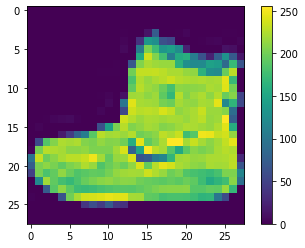

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

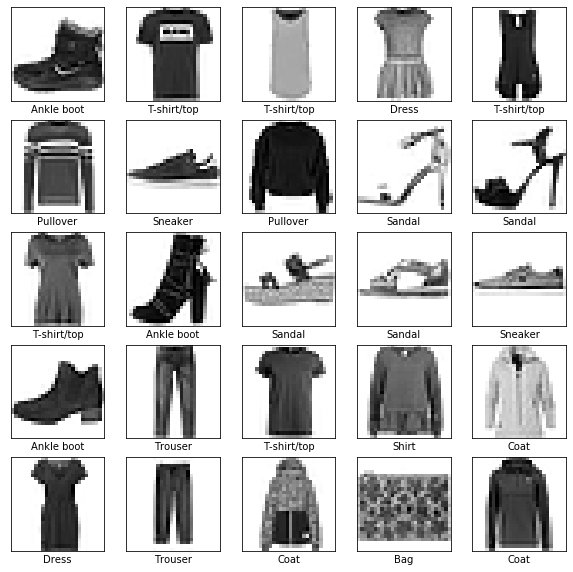

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Training

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=25)


Epoch 1/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1996 - accuracy: 0.9245
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1937 - accuracy: 0.9273
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1881 - accuracy: 0.9289
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1822 - accuracy: 0.9316
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1799 - accuracy: 0.9327
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1769 - accuracy: 0.9336
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1688 - accuracy: 0.9362
Epoch 8/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1665 - accuracy: 0.9373
Epoch 9/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1640 - accuracy: 0.9381
Epoch 10/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.160

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4314 - accuracy: 0.8902

Test accuracy: 0.8902000188827515


# Predict

In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_images)


In [28]:
predictions[0]


array([2.1378311e-17, 2.5512054e-15, 7.0121462e-15, 1.4513259e-18,
       3.0891335e-18, 2.1620070e-07, 1.5151739e-18, 2.9588512e-06,
       8.9324849e-14, 9.9999678e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])


9

In [30]:
test_labels[0]


9

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

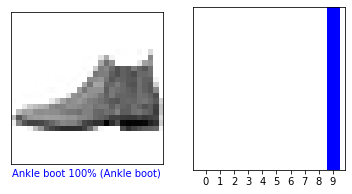

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

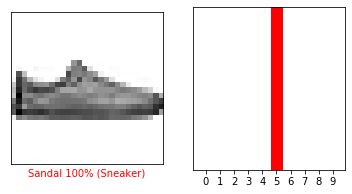

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

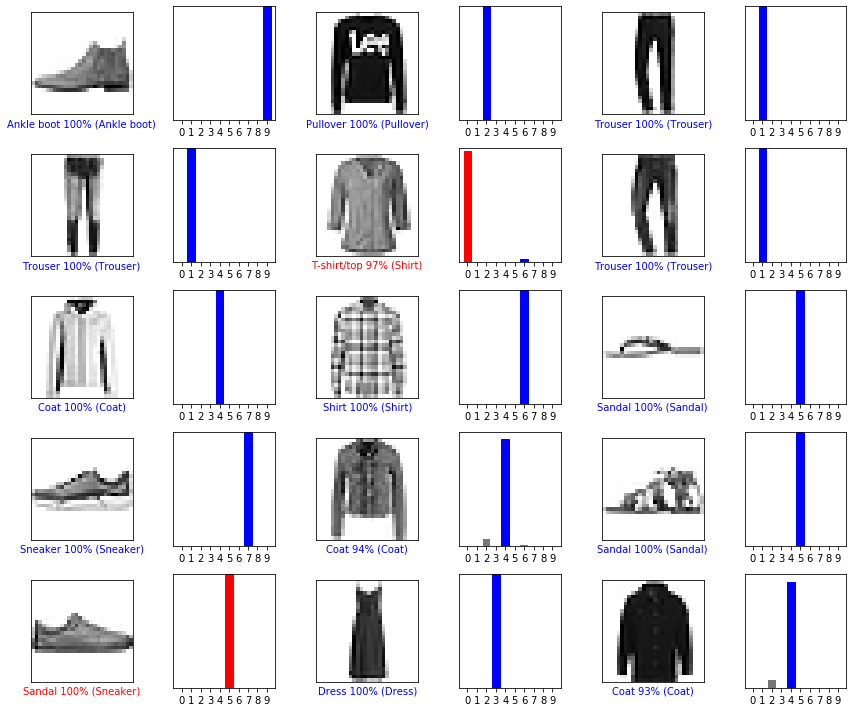

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()